# Web Scraping

Web Scraping is the process of gathering necessary information from internet.It is also termed as Web Harvesting or Web Extraction.
Copy pasting the data from wikipedia page to your local machine is also a kind of web scraping but it's a manual task. Web Scraping term is used when we automate a task of gathering the unorganized data into the format one needs. 

Some websites offer datasets that are downloadable in CSV or xls format and some expose their data to an API. But some websites wont offer us this facility. 


Example:If we want to do a Review analysis of different products sold on e-commerce website, and want to gather information like the "Comments" given my the customers, "Ratings" given , "Price" of the product, "Vendor" name etc, and the following e-commerce website does'nt allow us to download data in the format needed for analysis.


In such scenario copy pasting each and every information we need is not logical and is time consuming. Web scraping is a technique that lets us make use of programming to automate the task. We can write some code that looks at the e-commerce site, grabs just the data we want to work with and outputs it in the format we need.


Web Scraping includes following steps.

1. Find the URL that you want to scrape(E-Commerce Website,Weather Forecast Website,Travel Website etc).
2. Inspecting the Page(Finding and understanding different Elements on the web page which holds the important data which we    need , like the div,p,span tags on an HTML page).
3. Find the data you want to extract(Necessary information which we need).
4. Write the code(Program the code to extract the necessary data needed from the Elements analysed).
5. Run the code and extract the data.
6. Store the data in the required format(As per the need store the data, say in CSV or xls format).

When we do web scraping, we bascially write a code that sends a request to the server that host's the page we specified. Our code downloads the source code of the page, further it extracts whatever content we’ve instructed it to extract.


For example, if we want to get all of information inside p tags from a website, we could write some code that can extract the information inside the p tags.
Firstly, code would request the content from the server hosting the page and download it. Then it would go through the page’s HTML looking for the p tags. Whenever it found an p tags, it would copy whatever text is inside the tag, and output it in whatever format we specified.

Depending on our requirement we may be looking for specific tags for the information on HTML page, so accordingly we will be programming our code. 

Python is the most widely used programming language for web scraping because it comes packaged with different libraries which ease our task to extract the data from the website.




Below are few basic libraries which help us with the task.

1. "requests" libraries help's in getting the source code from the website.Library will make a GET request to a web server, which will download the HTML contents of a given web page.

Example: x=requests.get("http://weatherinfo.io/simplewebinfo.html")


Note: This is an hypothetical website used just to demonstrate.

We can print out the HTML content of the page using the content property.

content=x.content

print(content)

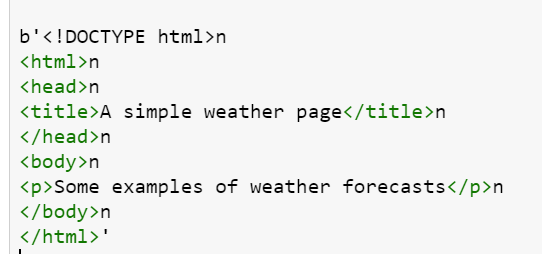

2. BeautifulSoup library  

We can use the BeautifulSoup library to parse the above downloaded HTML document, and extract the text from the p tag. 
We first have to import the library, create an instance of the BeautifulSoup class to parse the document.

from bs4 import BeautifulSoup -- Import the library.


soup = BeautifulSoup(content) -- Create an instance of the BeautifulSoup library and pass the content as an argument.

print(soup)

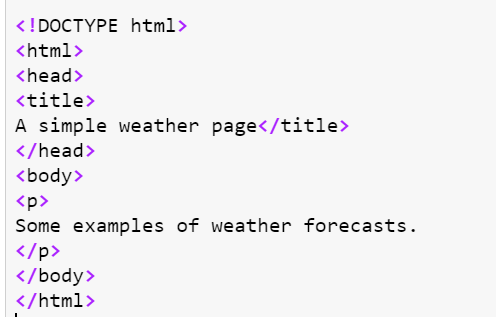

I have illustrated Web Scraping using a simple example.


In the below example we are extracting the information of the best selling gift cards on Amazon Website.

# Import Necesssay Libraries

In [13]:
#Import necessary libraries
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
import requests

# URL to Scrape

URL which we are scraping is "'https://www.amazon.in/gp/bestsellers/gift-cards/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo)"

As you can see from the URL it has a argument "pageno". Passing the argument we will be able to access information about gift cards on each page. To get the information of gift cards on all pages we can loop through all the pages and get our necessary data set.

# Inspect the page 

Identify the parent tag under which all the data you need will reside. The data that you are going to extract is

1. Gift Card Name.
2. Rating
3. Customers Rated
4. Price

Amazon Link For Reference:

https://www.amazon.in/gp/bestsellers/gift-cards/ref=zg_bs_gift-cards_home_all?pf_rd_p=3ca9e017-7be2-4b78-8c8d-9a28094b2453&pf_rd_s=center-1&pf_rd_t=2101&pf_rd_i=home&pf_rd_m=A1VBAL9TL5WCBF&pf_rd_r=TXZM2GV0T240F3ZJ3A5N&pf_rd_r=TXZM2GV0T240F3ZJ3A5N&pf_rd_p=3ca9e017-7be2-4b78-8c8d-9a28094b2453

The below image shows the parent tag which holds all the gift card details. When you hover over the tag you can see the 



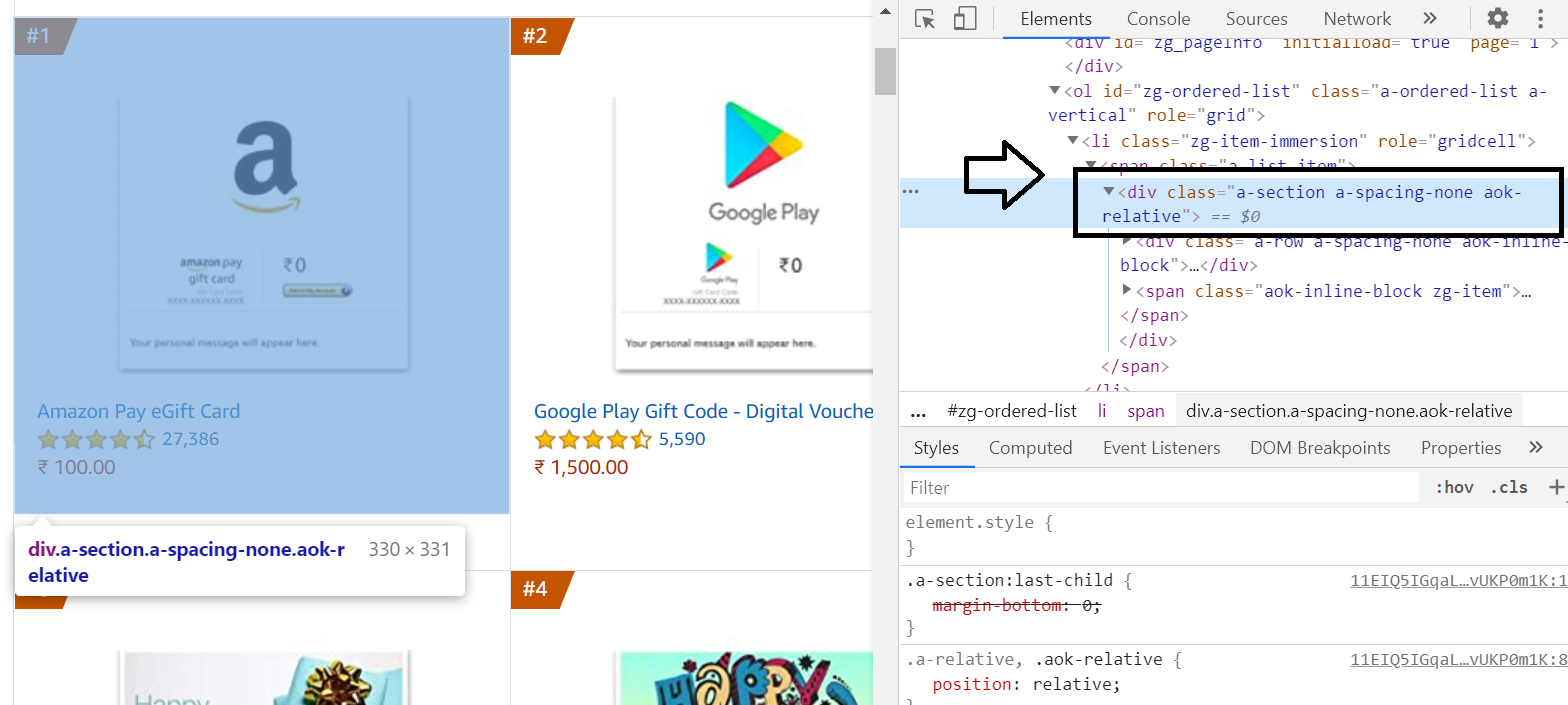


# Inspect Elements which hold the necessary information

Now that we have identified the parent tag, we need to inspect the elements that hold the information such as Price, Gift Card Name, Customer Rating, Count of total customers rated etc.


Now say we need to know the tag which holds information on "Price" of the gift card. We can right click on price tag, go to inspect as shown in image below. On right hand side we can see the tag holding the information on the price of the product.

Similary we can do it for "Gift Card Name", "Rating" etc.




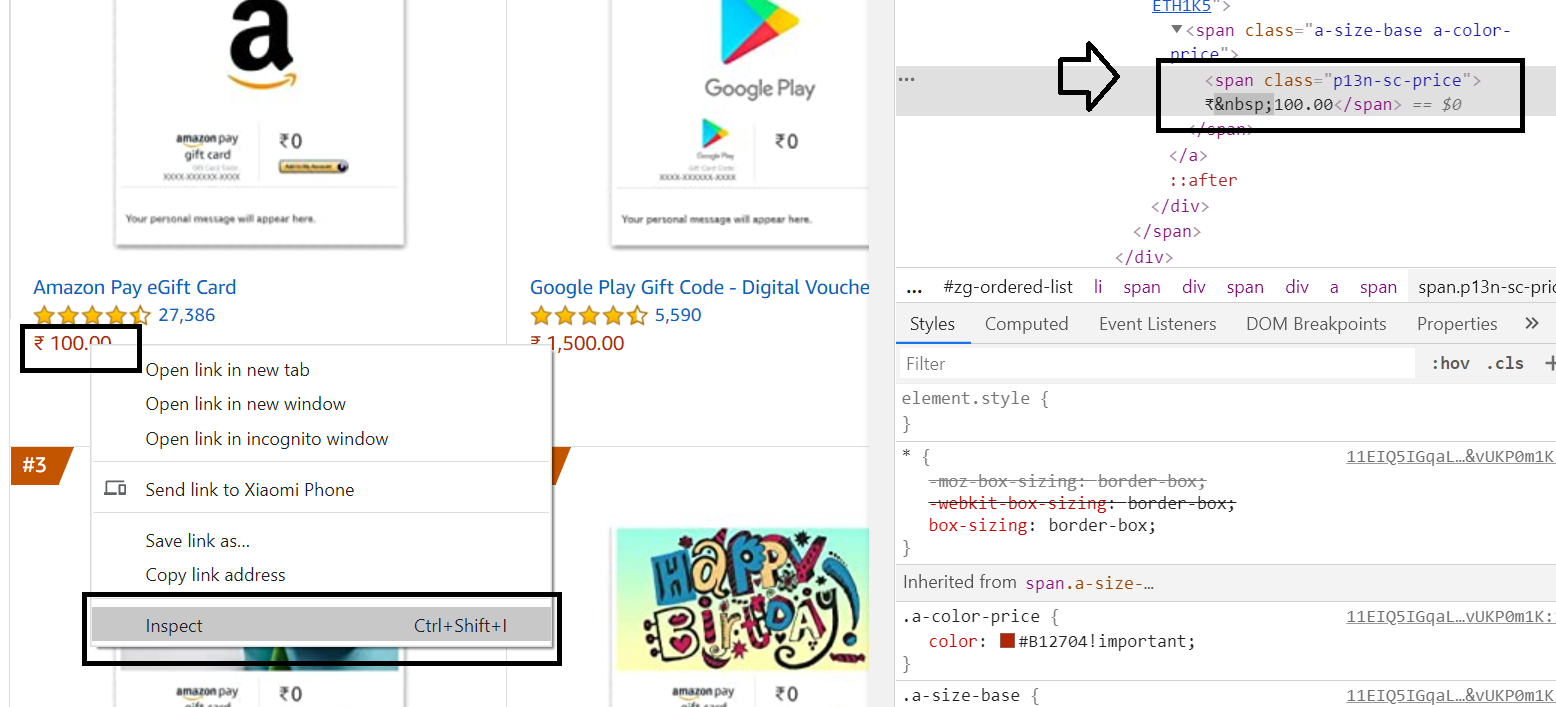

# Code to extract the necessary data from the HTML Document

Now, that we know the tags which hold the necessary information we can program the code using Python to extract necessary information from the identified tags.

We will be writing a function which will be looped to run for the number of pages for which the user what's the information.

get_info -- Function used.

lambda -- To flatten the output from the nested list output.

Description of the methods used.

find_all --  To find all the instances of an element.

find -- Find the first occurance of the element.

Variables Used:

divalls[] -- Array Variable used to store the entire nested list.

divall[] -- Array Variable used to store the list of lists of information for each iteration of the loop.


In [14]:
no_pages = 2

def get_info(pageNo):
    #Get the source code from the web server(Download the HTML contents of the web page)
    x = requests.get('https://www.amazon.in/gp/bestsellers/gift-cards/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo))
    content = x.content
    #Parse the HTML document downloaded, using Beautiful Soup library
    soup = BeautifulSoup(content)
    #Create an empty array to store the required information from all the HTML elements.
    divalls = []
    #findall method, which will find all the instances of a <div>tag with class attribute "a-section a-spacing-none aok-relative" on a page.
    #Note that find_all and findall returns a list, so we’ll have to loop through, or use list indexing, it to extract text.
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        # Find the first occurance of <span> tag with clas attribute "zg-text-center-align"
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        #find_all method, which will find all the instances of a <img> tag which includes the name of the gift card.
        n = name.find_all('img', alt=True)
        #span tag with attribute "a-icon-alt" below includes the rating given by the customers
        rating = d.find('span', attrs={'a-icon-alt'})
        # a tag with attribute "class':'a-size-small a-link-normal" includes the count of total reviews or ratings given by the customers for specific gift card. 
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        #span tag below includes the information on the price of the specific gift card 
        price = d.find('span', attrs={'p13n-sc-price'})

        divall=[]

        if name is not None:
            divall.append(n[0]['alt'])
        else:
            divall.append("unknown-card")

        if rating is not None:
            divall.append(rating.text)
        else:
            divall.append('-1')

        if users_rated is not None:
            divall.append(users_rated.text)
        else:
            divall.append('0')     

        if price is not None:
            divall.append(price.text)
        else:
            divall.append('0')
        divalls.append(divall)    
    return divalls

# Storing the data in required CSV format

In [15]:
output = []
for i in range(1, no_pages+1):
    output.append(get_info(i))
#Since the output will be a nested list, you would first flatten the list and then pass it to the DataFrame
#lambda is used to flatten the output.
flatten = lambda l: [item for sublist in l for item in sublist]
#Dataframe is created out of flattened output and then convereted into a csv file.
df = pd.DataFrame(flatten(output),columns=['Gift Card','Rating','Customers Rated', 'Price'])
df.to_csv('amazon_gift_cards.csv', index=False, encoding='utf-8')

# View the data

In [16]:
pd.read_csv('amazon_gift_cards.csv').head()

,Gift Card,Rating,Customers Rated,Price
0,Amazon Pay eGift Card,4.5 out of 5 stars,"27,441",₹ 100.00
1,Google Play Gift Code - Digital Voucher,4.3 out of 5 stars,"5,614","₹ 1,500.00"
2,Amazon Pay eGift Card,4.5 out of 5 stars,"27,441",₹ 10.00
3,Amazon Pay eGift Card,4.5 out of 5 stars,"27,441",₹ 100.00
4,Amazon Pay eGift Card,4.5 out of 5 stars,"27,441",₹ 100.00


We cannot directly use the data above for analysis. It is just a raw data that needs feature engineering so that it can be used for data analysis. 

Article gives basic idea about the Web Scraping.

Note:Feature Engineering part is not in scope of this article.